# Plot winter nutrients

## Load libraries

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Read

Data from an email from Mathieu Ardyna on May 19, 2023.
The data is published in Ardyna et al. (2020) $Elem\ Sci\ Anth$.
doi: 10.1525/elementa.430

The winter nutrient concentration is considered to be the maximum concentration for an expedition.

In [2]:
def load_nutrients():
    fname='Nutrient_database.csv'
    df=(
        pd.read_csv(
            fname,
            dtype={
                'Cruise': str,
                'Station': str,
                'Date': str,
                'Depth': np.float32,
                'Latitude': np.float32,
                'Longitude': np.float32,
                'Temperature': np.float32,
                'Salinity': np.float32,
                'Nitrate': np.float32,
                'Silicate': np.float32,
                'Phosphate': np.float32
            },
        )
    )
    return df

In [3]:
nutrients_ardyna2020_df=load_nutrients()
# nutrients_ardyna2020_df

In [4]:
cruises = pd.unique(nutrients_ardyna2020_df['Cruise'])
# cruises

In [5]:
grouped=nutrients_ardyna2020_df.groupby('Cruise')
nitrate_series =grouped['Nitrate'].max()
silicate_series=grouped['Silicate'].max()
nitrate_df =nitrate_series.to_frame()
silicate_df=silicate_series.to_frame()
order=["SubIce",
       "Icescape_2010",
       "Icescape_2011",
       "CASES",
       "CFL",
       "Resolute_2010",
       "Resolute_2011",
       "GreenEdge_IC_2015",
       "GreenEdge_IC_2016",
       "GreenEdge_Amundsen",
       "NICE"]
nitrate_df =nitrate_df.reindex(order)
silicate_df=silicate_df.reindex(order)

In [6]:
# nitrate_df

In [7]:
# silicate_df

# Plot

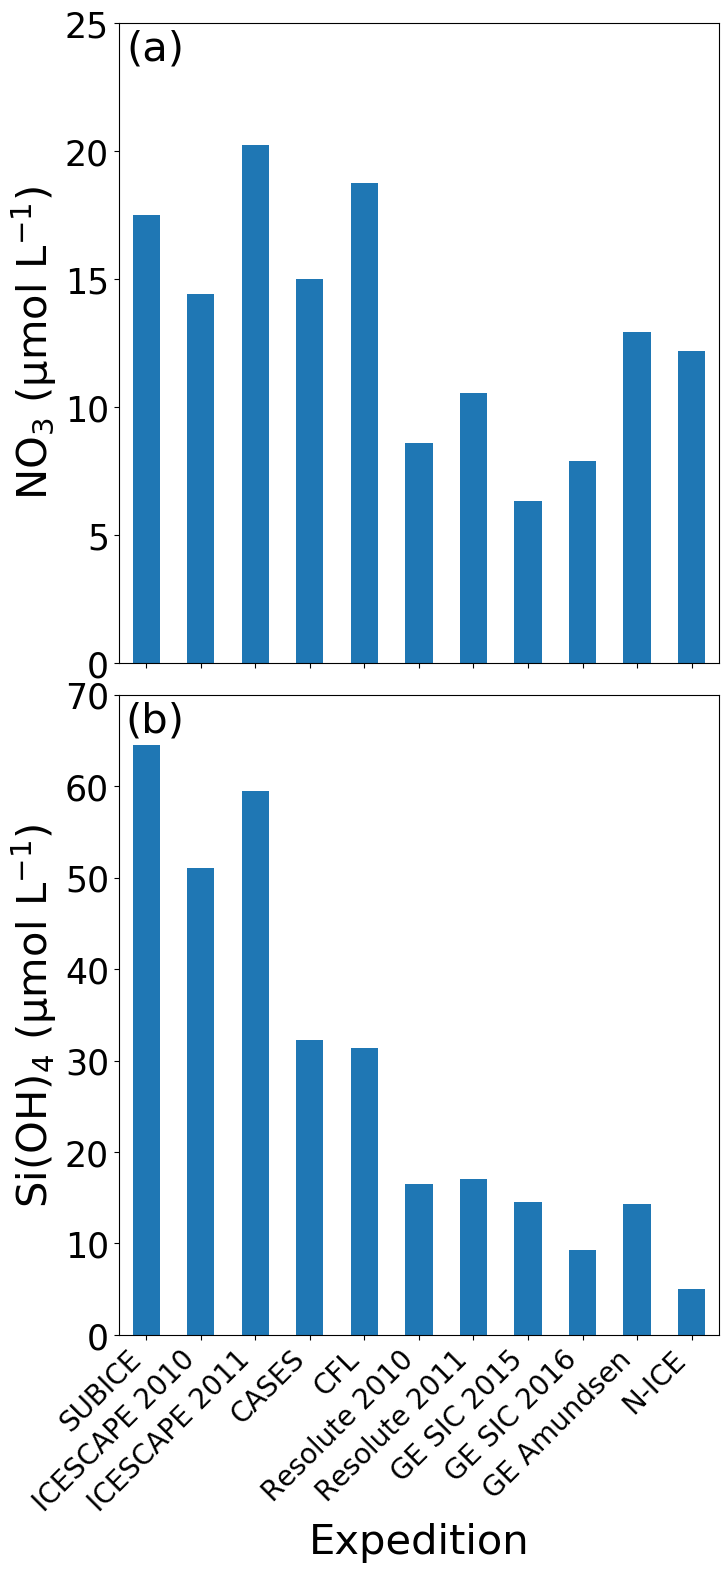

In [8]:
def make_plots(axs):
    
    # --- (a) NITRATE
    ax=axs[0]
    nitrate_df.plot(ax=ax,kind='bar',legend=False)
    ax.set_xlabel('')
    ax.set_xticklabels([])
    ax.set_ylabel('$\mathrm{ NO_3\ (\mu mol\ L^{-1}) }$')
    ax.set_ylim(0,25)
    plt.text(0.06,0.96,'(a)',
             horizontalalignment = 'center',
             verticalalignment='center',
             transform=ax.transAxes,
            fontsize=30)
    
    # --- (b) SILICIC ACID
    ax=axs[1]
    silicate_df.plot(ax=ax,kind='bar',legend=False)
    ax.set_xlabel('Expedition')
    ax.set_xticklabels(
        ('SUBICE',
         'ICESCAPE 2010',
         'ICESCAPE 2011',
         'CASES',
         'CFL',
         'Resolute 2010',
         'Resolute 2011',
         'GE SIC 2015',
         'GE SIC 2016',
         'GE Amundsen',
         'N-ICE'
         ),
        rotation=45,ha='right'
    )
    ax.set_ylabel('$\mathrm{ Si(OH)_4\ (\mu mol\ L^{-1}) }$')
    ax.set_ylim(0,70)
    plt.text(0.06,0.96,'(b)',
             horizontalalignment = 'center',
             verticalalignment='center',
             transform=ax.transAxes,
            fontsize=30)
    
    # --- POSITION
    axs[0].set_position( [0.20,0.57  ,0.75,0.40])
    axs[1].set_position( [0.20,0.15  ,0.75,0.40])

with plt.style.context('winter_nutrients.mplstyle'):    
    # Plot
    fig,axs=plt.subplots(2,1,sharex=False,figsize=(8, 16))
    make_plots(axs)

    # --- SAVE
    plt.savefig('winter_nutrients.png')